In [ ]:
#OpenCv é uma biblioteca usada para manipular arquivos de videos e imagens

In [55]:
import cv2
import numpy as np

In [2]:
image = cv2.imread('B:/python/Imagens/imagem6.jpg')

In [7]:
cv2.imshow('image', image)

In [10]:
# Converter a imagem para escala de cinza
imagem_cinza = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Exibir a imagem em escala de cinza
cv2.imshow('Imagem em Escala de Cinza', imagem_cinza)
cv2.waitKey(0)
cv2.destroyAllWindows()

Plotando com matplotlib

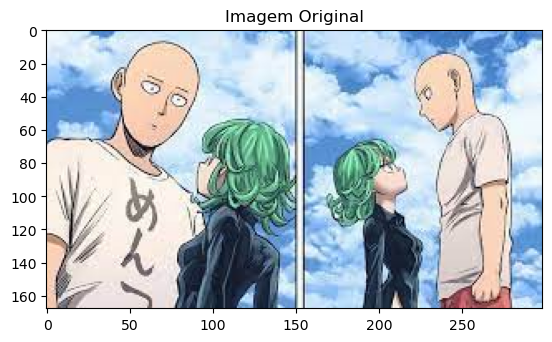

In [21]:
from matplotlib import pyplot as plt

# Carregar uma imagem
imagem = cv2.imread('B:/python/Imagens/imagem6.jpg')

# OpenCv le as imagens no formato BGR, vamos converter para RGB
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

# Exibir a imagem
plt.title('Imagem Original')
#plt.axis('off')
plt.imshow(imagem)
plt.show()

Recortando uma imagem

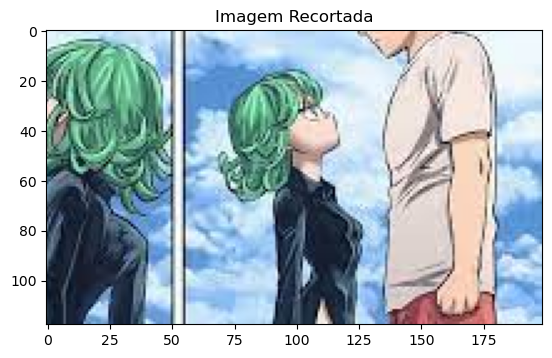

In [24]:
# Definir as coordenadas da região a ser recortada [y_inicio:y_fim, x_inicio:x_fim]
x_inicio, y_inicio = 100, 50
x_fim, y_fim = 400, 300

#Recorte da regiao da imagem
imagem_recortada = imagem[y_inicio:y_fim, x_inicio: x_fim]

plt.imshow(imagem_recortada)
plt.title('Imagem Recortada')
plt.show()


In [28]:
imagem.shape

(168, 299, 3)

In [27]:
#tamanho da imagem recortada
imagem_recortada.shape

(118, 199, 3)

Redimensionamento de imagens

In [29]:
#definir a largura e a altura desejada
nova_largura = 300
nova_altura = 200

imagem_redimensionada = cv2.resize(imagem, (nova_largura, nova_altura))

In [30]:
imagem_redimensionada.shape

(200, 300, 3)

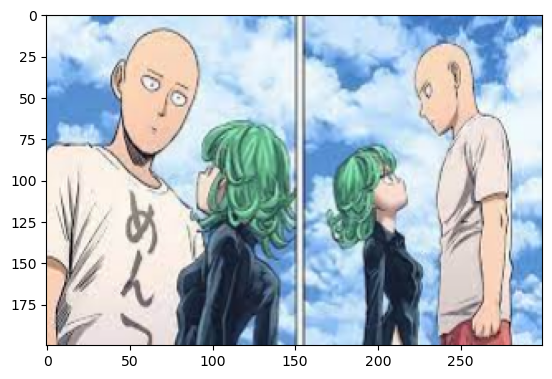

In [33]:
# Exibir imagem redimensionada
plt.imshow(imagem_redimensionada)
plt.show()

Espelhamento

<function matplotlib.pyplot.show(close=None, block=None)>

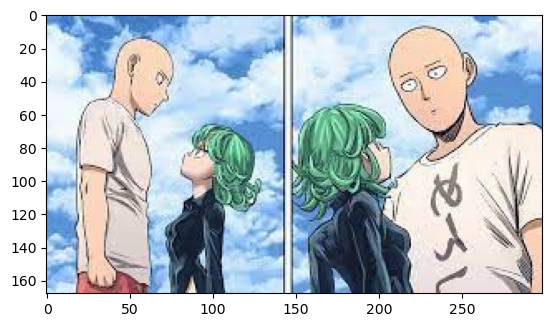

In [34]:
imagem_espelhada_horizontalmente = cv2.flip(imagem, 1)
plt.imshow(imagem_espelhada_horizontalmente)
plt.show

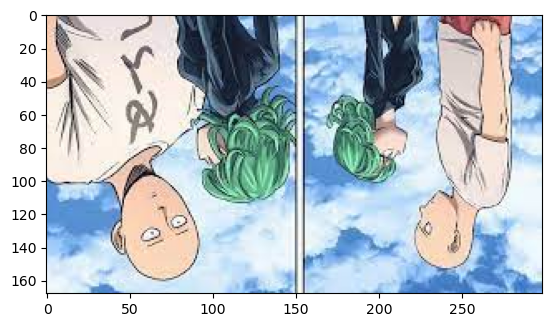

In [36]:
imagem_espelhada_verticalmente = cv2.flip(imagem, 0)
plt.imshow(imagem_espelhada_verticalmente)
plt.show()

In [42]:
angulo_de_rotacao = 45

In [43]:
altura, largura, = imagem.shape[:2] # obtem o centro da imagem

In [44]:
centro = (largura // 2, altura // 2)

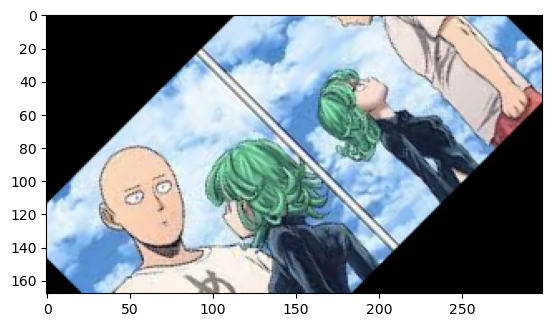

In [45]:
#realizar rotacao
matriz_rotacao = cv2.getRotationMatrix2D(centro, angulo_de_rotacao, 1.0)
imagem_rotacionada = cv2.warpAffine(imagem, matriz_rotacao, (largura, altura))

plt.imshow(imagem_rotacionada)
plt.show()

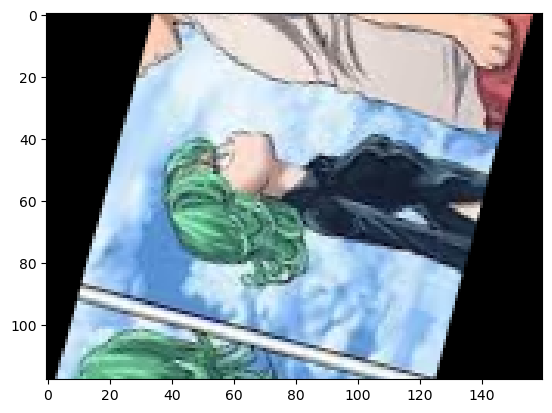

In [49]:
# Coordenadas para recorte da imagem
x_inicio, y_inicio = 120, 50
x_fim, y_fim = 280, 280

# Recorte da região da imagem
imagem_recortada = imagem[y_inicio:y_fim, x_inicio:x_fim]

# Dimensões da região recortada
altura, largura = imagem_recortada.shape[:2]

# Ângulo de rotação desejado
angulo_rotacao = 75

# Calcula o centro da região recortada
centro = (largura // 2, altura // 2)

# Matriz de rotação
matriz_rotacao = cv2.getRotationMatrix2D(centro, angulo_rotacao, 1.0)

# Aplica a rotação à região recortada
imagem_recortada_rotacionada = cv2.warpAffine(imagem_recortada, matriz_rotacao, (largura, altura))

# Exibir a imagem rotacionada
plt.imshow(imagem_recortada_rotacionada)
plt.show()

Suavizando imagens

In [50]:
imagem_cinza = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)  #converte pra escala de cinza

In [51]:
#Aplica filtros de media para suavizacao
kernel_size = 5 # tamanho do kernel do flitro de media(impar)
imagem_suavizada = cv2.blur(imagem_cinza, (kernel_size, kernel_size)) #funcao que borra as imagens

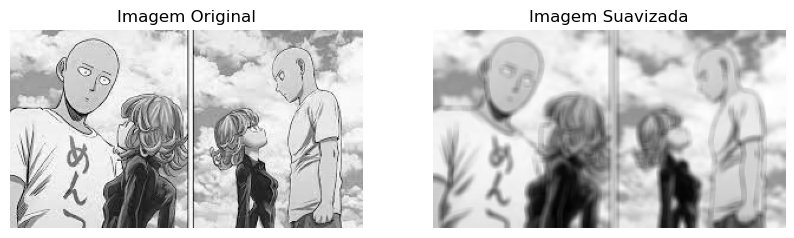

In [52]:
# Exibir a imagem original e a imagem suavizada
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(imagem_cinza, cmap='gray')
plt.title('Imagem Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(imagem_suavizada, cmap='gray')
plt.title('Imagem Suavizada')
plt.axis('off')

plt.show()

In [53]:
#aplicando filtragem

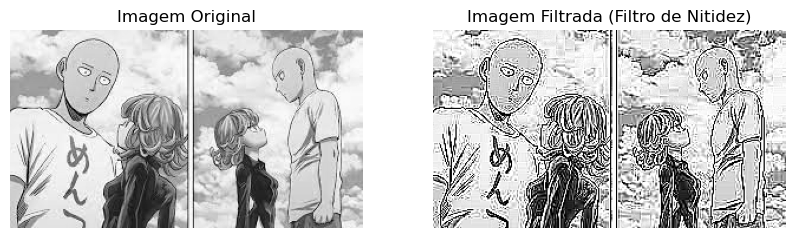

In [56]:
# Converter para escala de cinza
imagem_cinza = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)

# Aplicar filtro de nitidez
kernel_sharpening = np.array([[-1,-1,-1], 
                              [-1, 9,-1],
                              [-1,-1,-1]])
imagem_filtrada = cv2.filter2D(imagem_cinza, -1, kernel_sharpening)

# Exibir a imagem original e a imagem filtrada
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(imagem_cinza, cmap='gray')
plt.title('Imagem Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(imagem_filtrada, cmap='gray')
plt.title('Imagem Filtrada (Filtro de Nitidez)')
plt.axis('off')

plt.show()

Segmentacao

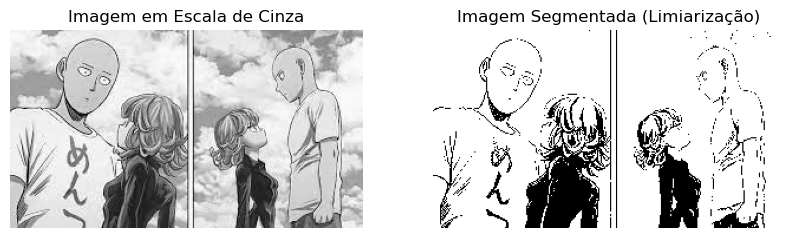

In [58]:
# Aplicar limiarização
limiar_valor = 127
limiarizado, imagem_segmentada = cv2.threshold(imagem_cinza, limiar_valor, 255, cv2.THRESH_BINARY)

# Exibir a imagem original e a imagem segmentada
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(imagem_cinza, cmap='gray')
plt.title('Imagem em Escala de Cinza')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(imagem_segmentada, cmap='gray')
plt.title('Imagem Segmentada (Limiarização)')
plt.axis('off')

plt.show()

Deteccao de Borda

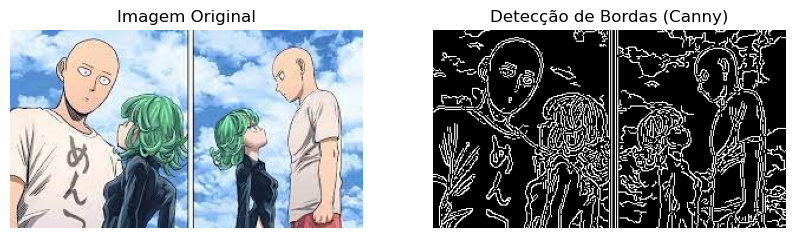

In [59]:
# Aplicar o algoritmo de detecção de bordas Canny
bordas = cv2.Canny(imagem, 100, 200)

# Exibir a imagem original e as bordas detectadas
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(imagem, cmap='gray')
plt.title('Imagem Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(bordas, cmap='gray')
plt.title('Detecção de Bordas (Canny)')
plt.axis('off')

plt.show()